In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [2]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id,
Sepal Length Cm,
Sepal Width Cm,,
Petal Length Cm,
Petal Width Cm,
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [3]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


We can now rename column name to make it more standard for ease of coding and readability.

In [4]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)

Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [5]:
iris_data['species'] = iris_data['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [6]:
data = iris_data[iris_data['species']=='versicolor'].copy() # Used .copy() to avoid any changes directly to main dataset

Now we are droping  all the columns except petal_length and petal_width

In [7]:
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


Now write code to print the shape of DataFrame named as data.

In [8]:
data.shape

(50, 2)

Now  plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter'

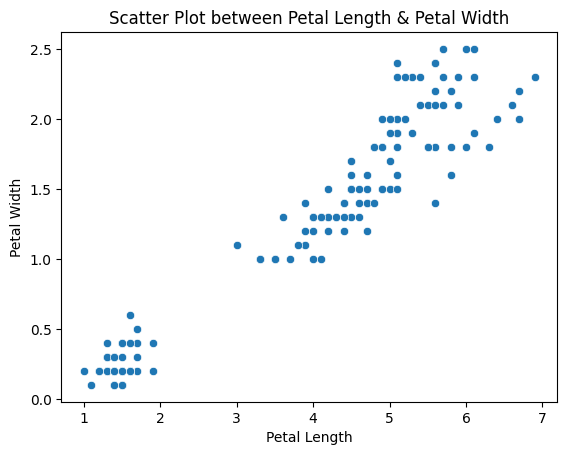

In [9]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris_data)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot between Petal Length & Petal Width')
plt.show()

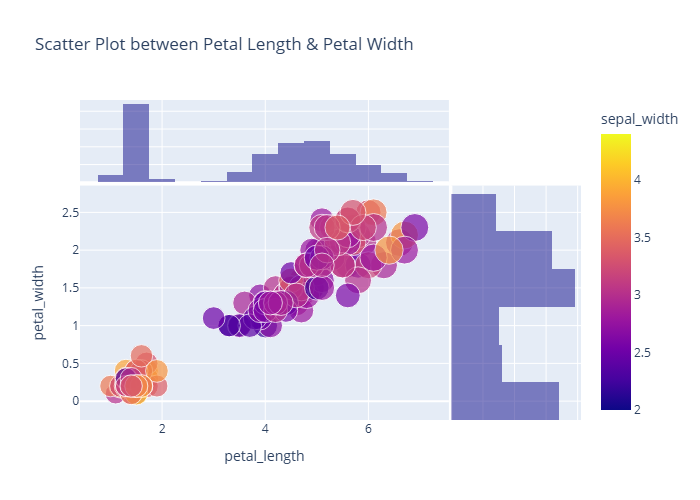

In [10]:
fig1 = px.scatter(iris_data, x='petal_length', y='petal_width', color='sepal_width', size='sepal_length', title='Scatter Plot between Petal Length & Petal Width', marginal_x='histogram', marginal_y='histogram')
fig1.show(renderer="png")

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [11]:
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)


Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

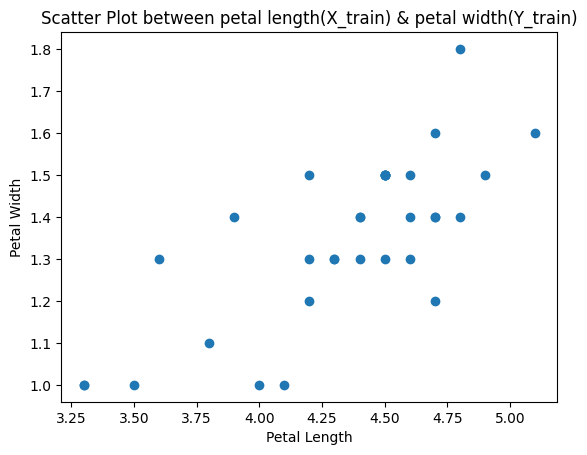

In [12]:
plt.scatter(X_train,Y_train)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot between petal length(X_train) & petal width(Y_train)')
plt.show()

Now let's plot the test datasets of kind scatter with x axis as X_test and y axis as Y_test

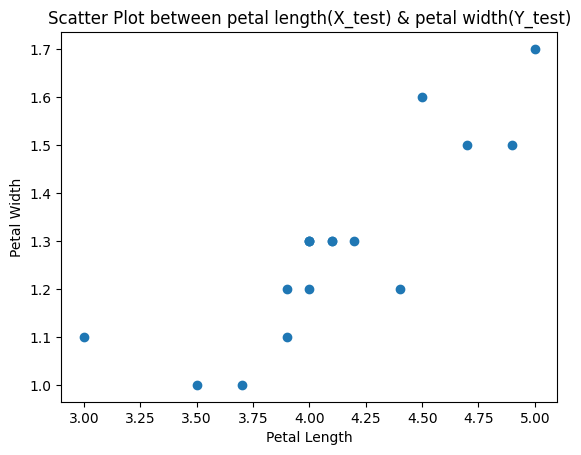

In [13]:
plt.scatter(X_test,Y_test)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot between petal length(X_test) & petal width(Y_test)')
plt.show()

Now write the code for LinearRegession using any preffered method.

In [14]:
X = np.array(X_train)
y = np.array(Y_train)

w = 1 # weight
b = 0.0 # bais
alpha_ = 0.01 # learning rate
epochs = 1000  # number of times to iterate
m = len(X)  # number of samples

for j in range(epochs+1):
    dj_dw = 0.0 # gradient of cost_function j w.r.t w
    dj_db = 0.0 # gradient of cost_function j w.r.t b
    for i in range(m):
        y_pred_i = w * X[i, 0] + b  # predicted value form the training example.  f(w,b) = w * x + b = y_pred
        error_i = y[i, 0] - y_pred_i  # error which is required to calculate cost_function, just need to be sqaured & multiply by alpha/m

        dj_dw -= X[i, 0] * error_i
        dj_db -= error_i

    dj_dw /= m
    dj_db /= m

    w -= alpha_ * dj_dw # revising value of w after every step
    b -= alpha_ * dj_db # revising value of b after every step
    if j % 100 == 0 :
      J = 1 / (2*m) * error_i**2
      print(f"Cost function : {J}, epoch: {j}")

print(f"\nFinal Learned Model: y = {w}x + {b}")

Cost function : 0.14560606060606066, epoch: 0
Cost function : 6.787593331973145e-05, epoch: 100
Cost function : 6.787144750044947e-05, epoch: 200
Cost function : 6.786700598077133e-05, epoch: 300
Cost function : 6.786260707200373e-05, epoch: 400
Cost function : 6.785825036399436e-05, epoch: 500
Cost function : 6.7853935450567e-05, epoch: 600
Cost function : 6.784966192947596e-05, epoch: 700
Cost function : 6.784542940237726e-05, epoch: 800
Cost function : 6.784123747478002e-05, epoch: 900
Cost function : 6.783708575601491e-05, epoch: 1000

Final Learned Model: y = 0.3436901579732755x + -0.14532447696735043


Now print the Intercept and Coefficient.

In [15]:
print(f'intercept: {w}')
print(f'coefficient: {b}')

intercept: 0.3436901579732755
coefficient: -0.14532447696735043


Now we can overlay the predicted line and test data points to see where the predicted point lies.

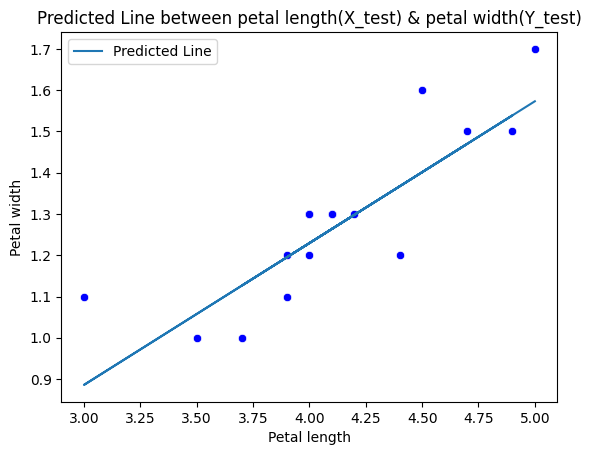

In [16]:
Y_predicted = w * X_test + b

sns.scatterplot(x=X_test.flatten(), y=Y_test.flatten(), color='blue') # Used .flatten() to convert multidimensional(here, 2) array in a 1D array
plt.plot(X_test, Y_predicted, label='Predicted Line')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Predicted Line between petal length(X_test) & petal width(Y_test)')
plt.legend()
plt.show()

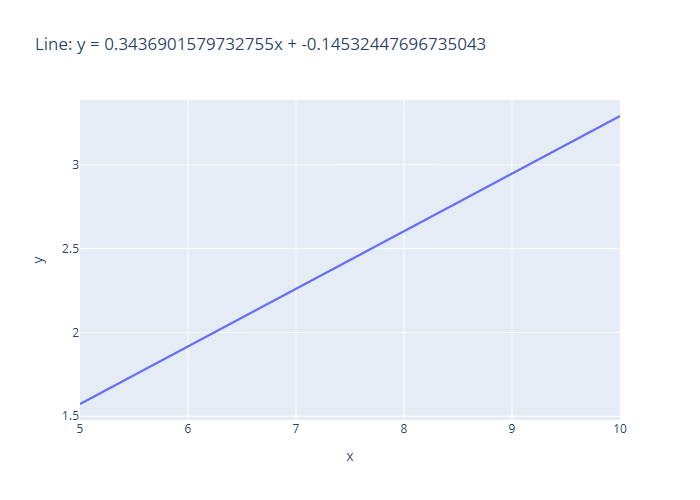

In [17]:
x = np.linspace(5, 10, 100)
y = w * x + b

df = pd.DataFrame({'x': x, 'y': y})

fig2 = px.line(df, x='x', y='y', title=f'Line: y = {w}x + {b}')
fig2.show(renderer='png')